# **Sentiment Analysis for the New Iphone 16**(*)
## Youtube Comments Analysis Using Youtube API

### Credits to: 
**Marques Brownlee**, a prominent tech Youtuber,reviewer and influencer.He gained fame for his in-depth tech reviews, hands-on unboxings, and insightful discussions on everything from smartphones and laptops to electric vehicles and other cutting-edge technology. Brownlee's work is highly respected for its production quality and depth of analysis, which has made him a trusted source in the tech community. 

### Website: [Marques Brownlee](https://www.youtube.com/@mkbhd)
### Youtube Video: [Click Here](https://www.youtube.com/watch?v=MRtg6A1f2Ko)

##### *Disclosure: Some comments and scripts are chatgpt assisted

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 

In [124]:
Image(url= "https://www.apple.com/newsroom/images/2024/09/apple-introduces-iphone-16-and-iphone-16-plus/article/Apple-iPhone-16-Apple-Intelligence-240909_big.jpg.large.jpg")

In [12]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import googleapiclient
from googleapiclient.discovery import build
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

### Extract comments from youtube video

In [6]:
import json

In [7]:
# Importing my API KEY from files

with open('"my api key.json"') as config_file:
    config=json.load(config_file)

In [8]:
api_key=config["API_KEY"]
video_id = 'MRtg6A1f2Ko'

In [13]:
youtube = build('youtube', 'v3', developerKey=api_key)

def get_comments(youtube, video_id):
    comments = []
    # Requiring comments
    request = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        textFormat='plainText'
    )

    # Execute the request and go through the comment pages
    while request:
        response = request.execute()
    
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)
        
        # Is there a next page?
        request = youtube.commentThreads().list_next(request, response)

    return comments

In [14]:
# Obtaining comments

comments = get_comments(youtube, video_id)

# Show Comments

for i, comment in enumerate(comments):
    print(f"{i + 1}. {comment}")

1. For clarity: Panels is free! We added an ad free  tier for those who want it, no pressure obviously if you didn't!
2. Moore David Taylor Kenneth Jones Thomas
3. Bought one, not for the promise of whats to come. But buying the newest generation to have longest update path. And upgrading from 13 mini, its a leap forward. The battery was draining me.
4. How can I join and create on panels?

@MarquesBrown
5. salty haters going wild in the comments 😂
6. I wish it was worth the price.
7. i cant even see the rationale of paying for something like this IF i had the money. like i could be SO RICH and still would find better things to put my money into that aren’t shit i can get FOR FREE ONLINE!!!
8. nobody's talking that they got inspiration from Sony Xperia 5 v literally
9. Satterfield Neck
10. Is 15 pro also gonna get apple inteligence?
11. Carter Trail
12. Mohr Shores
13. All MKBHD wallpapers used to be available on another app named 

Backdrops ✨️ 

I've been using it years now and stunn

In [15]:
# Migrating the comments to a dataframe

df=pd.DataFrame(comments,columns=["comments"])
df

,comments
0,For clarity: Panels is free! We added an ad fr...
1,Moore David Taylor Kenneth Jones Thomas
2,"Bought one, not for the promise of whats to co..."
3,How can I join and create on panels?\n\n@Marqu...
4,salty haters going wild in the comments 😂
...,...
12980,Marquees 😃
12981,First
12982,Nice
12983,First


In [16]:
print(f"There are {len(df):,} comments on the Youtube video review")

There are 12,985 comments on the Youtube video review


### Analysis

To proceed with the sentiment analysis im going to break this in many steps:

1. WordCloud: A visual representation of text data, where the size of each word indicates its frequency or importance within a given context.
2. Sentiment Analysis: A natural language processing model to categorize comments as positive, negative, or neutral.
3. Most relevant topics

#### 1. WordCloud

In [17]:
# Importing Libraries

import string
import nltk
import yake
import wordcloud
from nltk.corpus import stopwords
nltk.download("stopwords")
from wordcloud import WordCloud
from langdetect import detect, LangDetectException


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diazc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Step 1: Casting comments lo lower

df["comments"]=df["comments"].str.lower()
df

,comments
0,for clarity: panels is free! we added an ad fr...
1,moore david taylor kenneth jones thomas
2,"bought one, not for the promise of whats to co..."
3,how can i join and create on panels?\n\n@marqu...
4,salty haters going wild in the comments 😂
...,...
12980,marquees 😃
12981,first
12982,nice
12983,first


In [19]:
# Step 2: Removing punctuation and digits

exclist=string.punctuation+string.digits
exclist

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

In [20]:
# Applying the exclution list

for i in exclist:
   df["comments"]=df["comments"].str.replace(i,"")
df

,comments
0,for clarity panels is free we added an ad free...
1,moore david taylor kenneth jones thomas
2,bought one not for the promise of whats to com...
3,how can i join and create on panels\n\nmarques...
4,salty haters going wild in the comments 😂
...,...
12980,marquees 😃
12981,first
12982,nice
12983,first


In [21]:
# Detecting language for each comment

def f(x):
    try:
        result = detect(str(x))
    except LangDetectException as e:
        result = str(e)
    return result

In [22]:
df["language"]=df["comments"].apply(f)

In [23]:
df

,comments,language
0,for clarity panels is free we added an ad free...,en
1,moore david taylor kenneth jones thomas,en
2,bought one not for the promise of whats to com...,en
3,how can i join and create on panels\n\nmarques...,en
4,salty haters going wild in the comments 😂,en
...,...,...
12980,marquees 😃,ca
12981,first,en
12982,nice,pl
12983,first,en


In [28]:
# Filtering comments by english

english_reviews=df[df["language"]=="en"]
english_reviews

,comments,language
0,for clarity panels is free we added an ad free...,en
1,moore david taylor kenneth jones thomas,en
2,bought one not for the promise of whats to com...,en
3,how can i join and create on panels\n\nmarques...,en
4,salty haters going wild in the comments 😂,en
...,...,...
12978,first,en
12979,first,en
12981,first,en
12983,first,en


In [29]:
print(f"There are {len(english_reviews):,} comments in english")

There are 11,934 comments in english


In [30]:
# Step 3: Apply Stop Words in comments

stop_words=stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

____________________________________________________________________________________________________________________________________________________________________________

At second 32, Marques announces the launch of a wallpaper app called 'Panels,' so there will likely be comments discussing the wallpaper app. As the purpose of this video is to apply sentiment analysis, I will treat 'Wallpaper,' 'Wallpapers,' 'Panels,' 'app,' and many other logical words as outliers, which I will exclude from the DataFrame.

In [31]:
# Creating a personalized stopwords list that I know will disrupt the extraction of the Key Words

my_stopwords=["wallpaper","wallpapers","panels","app","apple","iphone","review","year","phone","mkbhd",
              "marque","marques","suscription","subscription","comment","comments","free","month","people","bro","time","video"] #mkbhd name of the channel
stop_words.extend(my_stopwords)

In [32]:
# Checking the stop_words extention

"wallpaper" and "panels" in stop_words

True

In [36]:
english_reviews.loc[:,'stopwords'] =english_reviews['comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
english_reviews

,comments,language,stopwords
0,for clarity panels is free we added an ad free...,en,clarity added ad tier want pressure obviously ...
1,moore david taylor kenneth jones thomas,en,moore david taylor kenneth jones thomas
2,bought one not for the promise of whats to com...,en,bought one promise whats come buying newest ge...
3,how can i join and create on panels\n\nmarques...,en,join create marquesbrown
4,salty haters going wild in the comments 😂,en,salty haters going wild 😂
...,...,...,...
12978,first,en,first
12979,first,en,first
12981,first,en,first
12983,first,en,first


In [39]:
# Step 4: Extract Keywords

language = 'en'
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 10
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size,dedupLim=deduplication_threshold,top=numOfKeywords, features=None)
extract_keywords = lambda x: ",".join(k[0] for k in custom_kw_extractor.extract_keywords(x))
english_reviews.loc[:,'keywords'] = english_reviews['stopwords'].apply(extract_keywords)

In [40]:
english_reviews

,comments,language,stopwords,keywords
0,for clarity panels is free we added an ad free...,en,clarity added ad tier want pressure obviously ...,"clarity added,pressure obviously didnt,added a..."
1,moore david taylor kenneth jones thomas,en,moore david taylor kenneth jones thomas,"moore david taylor,kenneth jones thomas,david ..."
2,bought one not for the promise of whats to com...,en,bought one promise whats come buying newest ge...,"forward battery draining,buying newest generat..."
3,how can i join and create on panels\n\nmarques...,en,join create marquesbrown,"join create marquesbrown,join create,create ma..."
4,salty haters going wild in the comments 😂,en,salty haters going wild 😂,"salty haters,haters going wild,salty,wild,haters"
...,...,...,...,...
12978,first,en,first,
12979,first,en,first,
12981,first,en,first,
12983,first,en,first,


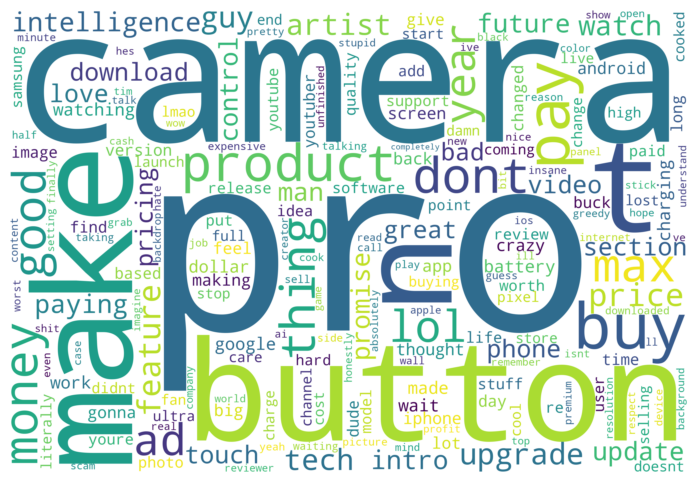

In [42]:
# Step 5: Create the Word Cloud

text=",".join(comment for comment in english_reviews.keywords)
my_wordcloud= WordCloud(collocations = False, background_color = 'white',width = 3048, height = 2080).generate(text)
plt.figure(figsize=(10,6))
plt.imshow(my_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Focus on Features:**

- The prominence of "camera" indicates that the video likely emphasizes the camera capabilities of the iPhone 16, which is often a key selling point for new iPhone models.
- The term "pro" may suggest discussions about the Pro model of the iPhone 16, highlighting its advanced features or improvements over previous versions.
- The inclusion of "button" could refer to the new added *"Action button" which replaced the ring-silent switch that's been on the iphone for years, offering more settings adjustments than just silencing your device.* [Cnet](https://www.cnet.com/tech/mobile/how-to-use-the-action-button-on-the-iphone-16-and-iphone-15-pro-and-15-pro-max/).

**Target Audience:**

- The keywords indicate that the video may cater to tech enthusiasts or potential buyers interested in the latest features and specifications of the iPhone 16, particularly those looking for enhancements in photography and usability.

#### 2. Sentiment Analysis

2.1 with **TextBlob**

- TextBlob uses a lexicon-based approach, which relies on the vocabulary and word scores in English
- Uses a lexicon-based approach for sentiment analysis, relying on predefined lists of words and their associated sentiments (positive, negative, neutral).
- It also includes grammatical rules and uses a more general machine learning model, which can make it more suitable for a wider range of text processing tasks beyond just sentiment analysis.

*Chatgpt definition

In [43]:
# Obtaining Library

from textblob import TextBlob

In [44]:
english_reviews

,comments,language,stopwords,keywords
0,for clarity panels is free we added an ad free...,en,clarity added ad tier want pressure obviously ...,"clarity added,pressure obviously didnt,added a..."
1,moore david taylor kenneth jones thomas,en,moore david taylor kenneth jones thomas,"moore david taylor,kenneth jones thomas,david ..."
2,bought one not for the promise of whats to com...,en,bought one promise whats come buying newest ge...,"forward battery draining,buying newest generat..."
3,how can i join and create on panels\n\nmarques...,en,join create marquesbrown,"join create marquesbrown,join create,create ma..."
4,salty haters going wild in the comments 😂,en,salty haters going wild 😂,"salty haters,haters going wild,salty,wild,haters"
...,...,...,...,...
12978,first,en,first,
12979,first,en,first,
12981,first,en,first,
12983,first,en,first,


In [45]:
sentiment_df=english_reviews[["comments"]]
sentiment_df

,comments
0,for clarity panels is free we added an ad free...
1,moore david taylor kenneth jones thomas
2,bought one not for the promise of whats to com...
3,how can i join and create on panels\n\nmarques...
4,salty haters going wild in the comments 😂
...,...
12978,first
12979,first
12981,first
12983,first


In [47]:
# Function to obtain the sentiment

def get_sentiment(text):
    analysis = TextBlob(text)
    # Polarity: -1 (negative) a 1 (positive)

    return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'

# Apply function

sentiment_df.loc[:,'sentiment'] = sentiment_df['comments'].apply(get_sentiment)

In [48]:
sentiment_df

,comments,sentiment
0,for clarity panels is free we added an ad free...,Positive
1,moore david taylor kenneth jones thomas,Neutral
2,bought one not for the promise of whats to com...,Neutral
3,how can i join and create on panels\n\nmarques...,Neutral
4,salty haters going wild in the comments 😂,Positive
...,...,...
12978,first,Positive
12979,first,Positive
12981,first,Positive
12983,first,Positive


2.2 With **VADER Library**

- Specifically designed for social media and other short text formats. It combines a lexicon of words with sentiment scores, taking into account the context in which words are used (e.g., negations, intensifiers).
- It is particularly effective for text that contains emoticons, slang, and informal language, making it a better fit for analyzing sentiment in social media posts, tweets, and similar platforms.

*ChatGPT definition

In [49]:
# Obtaining Library

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\diazc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [51]:
sia = SentimentIntensityAnalyzer()

# Function to obtain sentiment
def get_sentiment_vader(text):
    score = sia.polarity_scores(text)
    # Defining labels
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Applying Function

sentiment_df.loc[:,'sentiment'] = sentiment_df['comments'].apply(get_sentiment_vader)

In [52]:
sentiment_df

,comments,sentiment
0,for clarity panels is free we added an ad free...,Positive
1,moore david taylor kenneth jones thomas,Neutral
2,bought one not for the promise of whats to com...,Negative
3,how can i join and create on panels\n\nmarques...,Positive
4,salty haters going wild in the comments 😂,Negative
...,...,...
12978,first,Neutral
12979,first,Neutral
12981,first,Neutral
12983,first,Neutral


A brief summary for both libraries

- **TextBlob** is more versatile for general NLP (natural language processing) tasks but is less effective in handling informal sentiment analysis.

- **VADER** is specifically optimized for sentiment analysis in informal, short texts, making it a better choice for social media and similar platforms.
If you're working with social media data or want to analyze short text formats, VADER may be the better option. For more general text analysis tasks, TextBlob is a solid choice.

*Chatgpt

2.3 **Sentiment Visualizations**

In [53]:
sentiment_df

,comments,sentiment
0,for clarity panels is free we added an ad free...,Positive
1,moore david taylor kenneth jones thomas,Neutral
2,bought one not for the promise of whats to com...,Negative
3,how can i join and create on panels\n\nmarques...,Positive
4,salty haters going wild in the comments 😂,Negative
...,...,...
12978,first,Neutral
12979,first,Neutral
12981,first,Neutral
12983,first,Neutral


In [78]:
sentiment_counts_= sentiment_df["sentiment"].value_counts()
sentiment_counts_

sentiment
Positive    5248
Neutral     3581
Negative    3105
Name: count, dtype: int64

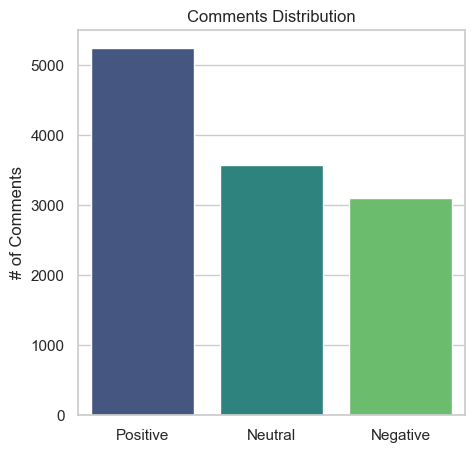

In [79]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.barplot(x=sentiment_counts_.index, y=sentiment_counts_.values, palette="viridis")
plt.xlabel("")
plt.ylabel("# of Comments")
plt.title("Comments Distribution")
plt.show()

In [60]:
sentiment_counts= sentiment_df.groupby(["sentiment"],as_index=False)["comments"].count().rename(columns=({"comments":"total"}))

In [56]:
import plotly_express as px

In [72]:
color_map = {
    "Positive": "green",
    "Negative": "red",
    "Neutral": "blue"
}

fig=px.bar(sentiment_counts,x="sentiment",y="total",color="sentiment",text="total",color_discrete_map=color_map)
fig.update_layout(width=800, height=600)
fig.show()

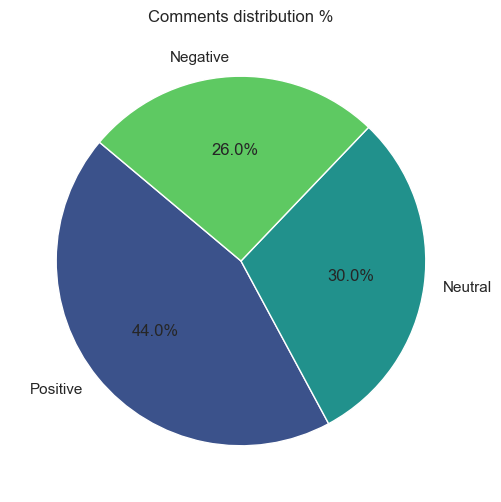

In [80]:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts_, labels=sentiment_counts_.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", 3))
plt.title("Comments distribution %")
plt.show()


In [81]:
sentiment_counts

,sentiment,total
0,Negative,3105
1,Neutral,3581
2,Positive,5248


In [76]:
fig=px.pie(sentiment_counts,names="sentiment",values="total",color="sentiment",color_discrete_map=color_map)
fig.update_layout(width=800, height=600)
fig.show()

In [89]:
total_comments = sentiment_counts['total'].sum()
positive_comments=sentiment_counts.loc[sentiment_counts["sentiment"]=="Positive","total"].values[0]
negative_comments=sentiment_counts.loc[sentiment_counts["sentiment"]=="Negative","total"].values[0]
neutral_comments=sentiment_counts.loc[sentiment_counts["sentiment"]=="Neutral","total"].values[0]

In [90]:
positive_percentage = (positive_comments / total_comments) * 100
negative_percentage = (negative_comments / total_comments) * 100

In [91]:
markdown_text = f"""
These results reflect a mostly positive perception around the iPhone 16, with {positive_percentage:.1f}% positive comments compared to {negative_percentage:.1f}% negative comments.

- **Positive Reception:** Most comments have a positive tone ({positive_comments:,}), which could indicate that the general public is enthusiastic or satisfied with the features and improvements of the iPhone 16. It’s possible that aspects such as design, camera, performance, or perhaps the new action button.

- **Neutral Interest and Curiosity:** With {neutral_comments:,} neutral comments, there may be many questions, informational comments, or comparisons without clear opinions, which is common in product launch videos, where many users are interested in learning details before forming an opinion.

- **Criticisms and Doubts:** The {negative_comments:,} negative comments could indicate points of dissatisfaction, such as price, lack of significant changes, issues with specific features, or unfavorable comparisons with previous models or competing brands.
"""

These results reflect a mostly positive perception around the iPhone 16, with 44% positive comments compared to 26% negative comments.

- **Positive Reception:** Most comments have a positive tone (5.240), which could indicate that the general public is enthusiastic or satisfied with the features and improvements of the iPhone 16. It’s possible that aspects such as design, camera, performance, or perhaps the new action button.

- **Neutral Interest and Curiosity:** With 3.573 neutral comments, there may be many questions, informational comments, or comparisons without clear opinions, which is common in product launch videos, where many users are interested in learning details before forming an opinion.

- **Criticisms and Doubts:** The 3.102 negative comments could indicate points of dissatisfaction, such as price, lack of significant changes, issues with specific features, or unfavorable comparisons with previous models or competing brands.

**ANALYZING THE NEGATIVE COMMENTS**

Let's dive in into the negative comments

In [93]:
sentiment_df

,comments,sentiment
0,for clarity panels is free we added an ad free...,Positive
1,moore david taylor kenneth jones thomas,Neutral
2,bought one not for the promise of whats to com...,Negative
3,how can i join and create on panels\n\nmarques...,Positive
4,salty haters going wild in the comments 😂,Negative
...,...,...
12978,first,Neutral
12979,first,Neutral
12981,first,Neutral
12983,first,Neutral


In [94]:
# Filtering by negative comments

filter=sentiment_df["sentiment"]=="Negative"
negative_comments=sentiment_df[filter]
negative_comments

,comments,sentiment
2,bought one not for the promise of whats to com...,Negative
4,salty haters going wild in the comments 😂,Negative
18,panels why we need to pay for a wallpaper,Negative
32,how genuinely disappointing it is when someone...,Negative
63,“never buy a product for the promise of vague ...,Negative
...,...,...
12868,this is the worst iphone update ever…… thumbs ...,Negative
12879,sick intro as always 🎉,Negative
12905,sick intro,Negative
12906,seconds ago is crazy,Negative


In [96]:
negative_comments.loc[:,"stopwords"]= negative_comments["comments"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
negative_comments

,comments,sentiment,stopwords
2,bought one not for the promise of whats to com...,Negative,bought one promise whats come buying newest ge...
4,salty haters going wild in the comments 😂,Negative,salty haters going wild 😂
18,panels why we need to pay for a wallpaper,Negative,need pay
32,how genuinely disappointing it is when someone...,Negative,genuinely disappointing someone preaches much ...
63,“never buy a product for the promise of vague ...,Negative,“never buy product promise vague future update...
...,...,...,...
12868,this is the worst iphone update ever…… thumbs ...,Negative,worst update ever…… thumbs agree
12879,sick intro as always 🎉,Negative,sick intro always 🎉
12905,sick intro,Negative,sick intro
12906,seconds ago is crazy,Negative,seconds ago crazy


In [98]:
language = 'en'
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 10
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size,dedupLim=deduplication_threshold,top=numOfKeywords, features=None)
extract_keywords = lambda x: ",".join(k[0] for k in custom_kw_extractor.extract_keywords(x))
negative_comments.loc[:,'keywords'] = negative_comments['stopwords'].apply(extract_keywords)

In [99]:
negative_comments

,comments,sentiment,stopwords,keywords
2,bought one not for the promise of whats to com...,Negative,bought one promise whats come buying newest ge...,"forward battery draining,buying newest generat..."
4,salty haters going wild in the comments 😂,Negative,salty haters going wild 😂,"salty haters,haters going wild,salty,wild,haters"
18,panels why we need to pay for a wallpaper,Negative,need pay,pay
32,how genuinely disappointing it is when someone...,Negative,genuinely disappointing someone preaches much ...,"bankrupt based premise,promise future feature,..."
63,“never buy a product for the promise of vague ...,Negative,“never buy product promise vague future update...,"buy product promise,product promise vague,prom..."
...,...,...,...,...
12868,this is the worst iphone update ever…… thumbs ...,Negative,worst update ever…… thumbs agree,"thumbs agree,worst update,worst,thumbs,agree,u..."
12879,sick intro as always 🎉,Negative,sick intro always 🎉,"sick intro,sick,intro"
12905,sick intro,Negative,sick intro,"sick intro,sick,intro"
12906,seconds ago is crazy,Negative,seconds ago crazy,"ago crazy,crazy,ago"


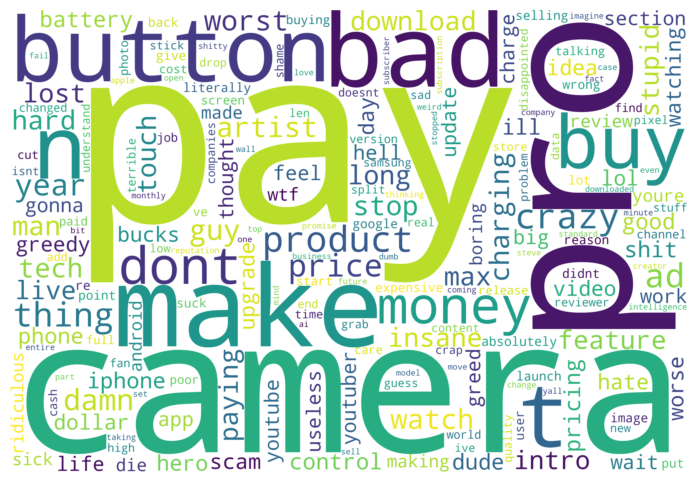

In [100]:
text=",".join(comment for comment in negative_comments.keywords)
my_wordcloud= WordCloud(collocations = False, background_color = 'white',width = 3048, height = 2080).generate(text)
plt.figure(figsize=(10,6))
plt.imshow(my_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The highlighted words in your word cloud of negative comments about the iPhone 16 offer insights into user concerns and criticisms. 
Here’s an analysis of each keyword:

**Pay:**

- The inclusion of "pay" suggests that users are discussing the price of the iPhone 16 (USD $1.000) 
- It may imply that they consider the cost too high relative to what the device offers. 

This could reflect a general dissatisfaction with the perceived value of the product.

**Camera**

- The word "camera" indicates specific concerns about the quality or performance of the camera. 
- This might be related to issues with photo or video quality, or unfavorable comparisons with previous models or competitors.


**Make**

- The presence of "make" could be linked to comments about the device's construction, design, or material quality. 
- It might also refer to the need to "make" improvements in future iterations of the iPhone or necessary changes in the user experience.

#### 3 Relevant Topics

In [101]:
# Importing Libraries

from nltk.tokenize import word_tokenize
nltk.download('punkt')
from gensim import corpora

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diazc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [112]:
def preprocess_comment(comment):
    words = word_tokenize(comment.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words

sentiment_df.loc[:,'topics'] = sentiment_df['comments'].apply(preprocess_comment)

In [113]:

dictionary = corpora.Dictionary(sentiment_df['topics'])
corpus = [dictionary.doc2bow(comment) for comment in sentiment_df['topics']]


In [114]:
sentiment_df

,comments,sentiment,topics
0,for clarity panels is free we added an ad free...,Positive,"[clarity, added, ad, tier, want, pressure, obv..."
1,moore david taylor kenneth jones thomas,Neutral,"[moore, david, taylor, kenneth, jones, thomas]"
2,bought one not for the promise of whats to com...,Negative,"[bought, one, promise, whats, come, buying, ne..."
3,how can i join and create on panels\n\nmarques...,Positive,"[join, create, marquesbrown]"
4,salty haters going wild in the comments 😂,Negative,"[salty, haters, going, wild]"
...,...,...,...
12978,first,Neutral,[first]
12979,first,Neutral,[first]
12981,first,Neutral,[first]
12983,first,Neutral,[first]


In [117]:
from gensim.models import LdaModel
import pyLDAvis.gensim_models
import pyLDAvis

In [122]:
# number of topics
num_topics = 2 

# Applying LDA Model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Show Topics
for idx, topic in lda_model.print_topics(num_words=5):
    print(f'Topic {idx + 1}: {topic}')


Topic 1: 0.015*"pro" + 0.012*"new" + 0.012*"like" + 0.011*"get" + 0.009*"ai"
Topic 2: 0.015*"camera" + 0.014*"button" + 0.009*"like" + 0.006*"never" + 0.006*"would"


In [123]:
# Showing LDA Model

vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary,R=5)
pyLDAvis.display(vis)

### 4. Conclusions from the Sentiment Analysis of the iPhone 16

1. Focus on Key Features:

- The high mention of the camera suggests that it is a central element of the video, indicating that the camera capabilities of the iPhone 16 are a major draw for viewers.

- The reference to the term "pro" indicates that there are discussions around the Pro model, suggesting an interest in its advanced features and improvements over previous versions.

- The mention of the "button" suggests a discussion about the new "Action button," which has replaced the ring-silent switch, offering more customization options, potentially enhancing the user experience.

2. Target Audience:

- The keywords indicate that the video is aimed at tech enthusiasts or potential buyers interested in the latest features and specifications of the iPhone 16, particularly those looking for enhancements in photography and usability.

3. Mostly Positive Perception:

- The results reflect a mostly positive perception of the iPhone 16, with 44% positive comments compared to 26% negative comments. This indicates that, overall, the audience is excited about the launch.

4. Positive Reception:

- The majority of comments (5,240) are of a positive tone, which suggests that the general public is satisfied with the improvements and features of the iPhone 16, such as design, camera, and performance.

5. Neutral Interest and Curiosity:

- With 3,573 neutral comments, there is considerable interest from users seeking information or comparisons, which is typical in product launch videos where consumers want to understand more before making decisions.

6. Criticisms and Doubts:

- The 3,102 negative comments suggest areas of dissatisfaction that may include pricing, lack of significant changes, issues with specific features, or unfavorable comparisons with previous models or competing brands. This could be a point of focus for Apple’s development and marketing teams.

**Implications for Marketing and Product Development:**


- Marketing Strategy: Given the overall positive perception and the focus on camera features and the new button, marketing campaigns could center around these elements to attract photography and tech enthusiasts.

- Future Improvements: Feedback from negative comments could guide Apple in identifying areas for improvement in future models or updates, especially regarding consumer expectations around pricing and significant product changes.

**General Conclusion:**

- The sentiment analysis reveals general enthusiasm for the iPhone 16, but also highlights the importance of addressing user criticisms and concerns. This not only helps Apple improve its product but also strengthens customer loyalty by demonstrating that it values user feedback.

_______________________________________________________________________________________________________